In [34]:
import pandas as pd
import numpy as np
import altair as alt
from scipy.stats import f_oneway, bootstrap
import matplotlib as plt

In [5]:
df = pd.read_csv('human_evaluation_sample - human_evaluation_sample.csv')

In [6]:
df.head()

,assigned_to,title,published,url,video_id,channel_id,baseline_summary,rag_summary,human_summary,quality_of_baseline,quality_of_rag,quality_of_human,relevance_of_baseline,relevance_of_rag,relevance_of_human,informative_of_baseline,informative_of_rag,informative_of_human
0,Yingying,What Is Neuralink??! - TDBS 22 April 2017,2017-04-23 11:37:29,What Is Neuralink??! - TDBS 22 April 2017,ToZyCA0uvoI,UCr8O8l5cCX85Oem1d18EezQ,Daniel Burke is standing up and doing this liv...,You are an expert summarizer. Given the follow...,"A vlog video by Daniel Burke, overall its a di...",1,1,4,1,1,5,1,1,4
1,Yingying,[ML News] Hugging Face course | GAN Theft Auto...,2021-06-24 12:35:09,https://youtu.be/6_q9DbX35kk,6_q9DbX35kk,UCZHmQk67mSJgfCCTn7xBfew,Huggingface releases a course you can now play...,Huggingface releases a course you can now play...,"A ML News video that discusses Hugginf Face, h...",3,2,5,2,2,5,2,2,5
2,Yingying,I TRAINED AN AI TO SOLVE 2+2 (w/ Live Coding),2020-08-06 16:30:14,https://youtu.be/udS2OPohs_s,udS2OPohs_s,UCZHmQk67mSJgfCCTn7xBfew,Today we're going to build an AI that's going ...,You are an expert summarizer. Given the follow...,An implementation of someone uses Generative ...,2,1,4,4,1,5,2,1,3
3,Yingying,Code with me (live): How to make your first Ka...,2018-12-02 5:03:43,https://youtu.be/f1y9wDDxWnA,f1y9wDDxWnA,UCr8O8l5cCX85Oem1d18EezQ,Kashuk is a machine learning engineer at the U...,You are an expert summarizer. Given the follow...,A livestream video where the creator walks thr...,4,1,5,3,1,5,4,1,3
4,Yingying,Loading in your own data - Deep Learning basic...,2018-08-18 13:50:58,https://youtu.be/j-3vuBynnOE,j-3vuBynnOE,UCfzlCWGWYyIQ0aLC5w48gBQ,"Part two of our deep learning with Python, Ten...",This tutorial is part three of our deep learni...,"A tutorial video on Deep Learning with Python,...",4,4,4,3,3,4,3,3,5


In [7]:
mdlNameDic = {'baseline':'bart-large-cnn'
              ,'rag':'RAG'
              ,'human':'Human'}

In [8]:
quality = pd.DataFrame(df[['quality_of_baseline', 'quality_of_rag', 'quality_of_human']].mean(), columns=['score'])
quality['model'] = quality.index.to_series().apply(lambda x: mdlNameDic[x.split('_')[-1]])
quality['score_name'] = 'quality'

quality

,score,model,score_name
quality_of_baseline,3.000000,bart-large-cnn,quality
quality_of_rag,2.166667,RAG,quality
quality_of_human,4.300000,Human,quality


In [9]:
relevance = pd.DataFrame(df[['relevance_of_baseline', 'relevance_of_rag', 'relevance_of_human']].mean(), columns=['score'])
relevance['model'] = relevance.index.to_series().apply(lambda x:  mdlNameDic[x.split('_')[-1]])
relevance['score_name'] = 'relevance'

relevance

,score,model,score_name
relevance_of_baseline,3.133333,bart-large-cnn,relevance
relevance_of_rag,2.200000,RAG,relevance
relevance_of_human,4.266667,Human,relevance


In [10]:
informative = pd.DataFrame(df[['informative_of_baseline', 'informative_of_rag', 'informative_of_human']].mean(), columns=['score'])
informative['model'] = informative.index.to_series().apply(lambda x:  mdlNameDic[x.split('_')[-1]])
informative['score_name'] = 'informativeness'

informative

,score,model,score_name
informative_of_baseline,3.033333,bart-large-cnn,informativeness
informative_of_rag,2.166667,RAG,informativeness
informative_of_human,4.100000,Human,informativeness


In [11]:
scoreDf = pd.concat([quality, relevance, informative])
scoreDf

,score,model,score_name
quality_of_baseline,3.000000,bart-large-cnn,quality
quality_of_rag,2.166667,RAG,quality
quality_of_human,4.300000,Human,quality
relevance_of_baseline,3.133333,bart-large-cnn,relevance
relevance_of_rag,2.200000,RAG,relevance
relevance_of_human,4.266667,Human,relevance
informative_of_baseline,3.033333,bart-large-cnn,informativeness
informative_of_rag,2.166667,RAG,informativeness
informative_of_human,4.100000,Human,informativeness


- Anova test to test there is a difference between scores (e.g. quality) of at least two groups

In [ ]:

samp1 = np.array(df.quality_of_baseline)

samp2 = np.array(df.quality_of_rag)

samp3 = np.array(df.quality_of_human)

F = f_oneway(samp1,samp3,samp3, equal_var=False)

print(F.pvalue)

1.5795554042277404e-06


- bootstrap confidence intervals

In [ ]:
df.head()

,assigned_to,title,published,url,video_id,channel_id,baseline_summary,rag_summary,human_summary,quality_of_baseline,quality_of_rag,quality_of_human,relevance_of_baseline,relevance_of_rag,relevance_of_human,informative_of_baseline,informative_of_rag,informative_of_human
0,Yingying,What Is Neuralink??! - TDBS 22 April 2017,2017-04-23 11:37:29,What Is Neuralink??! - TDBS 22 April 2017,ToZyCA0uvoI,UCr8O8l5cCX85Oem1d18EezQ,Daniel Burke is standing up and doing this liv...,You are an expert summarizer. Given the follow...,"A vlog video by Daniel Burke, overall its a di...",1,1,4,1,1,5,1,1,4
1,Yingying,[ML News] Hugging Face course | GAN Theft Auto...,2021-06-24 12:35:09,https://youtu.be/6_q9DbX35kk,6_q9DbX35kk,UCZHmQk67mSJgfCCTn7xBfew,Huggingface releases a course you can now play...,Huggingface releases a course you can now play...,"A ML News video that discusses Hugginf Face, h...",3,2,5,2,2,5,2,2,5
2,Yingying,I TRAINED AN AI TO SOLVE 2+2 (w/ Live Coding),2020-08-06 16:30:14,https://youtu.be/udS2OPohs_s,udS2OPohs_s,UCZHmQk67mSJgfCCTn7xBfew,Today we're going to build an AI that's going ...,You are an expert summarizer. Given the follow...,An implementation of someone uses Generative ...,2,1,4,4,1,5,2,1,3
3,Yingying,Code with me (live): How to make your first Ka...,2018-12-02 5:03:43,https://youtu.be/f1y9wDDxWnA,f1y9wDDxWnA,UCr8O8l5cCX85Oem1d18EezQ,Kashuk is a machine learning engineer at the U...,You are an expert summarizer. Given the follow...,A livestream video where the creator walks thr...,4,1,5,3,1,5,4,1,3
4,Yingying,Loading in your own data - Deep Learning basic...,2018-08-18 13:50:58,https://youtu.be/j-3vuBynnOE,j-3vuBynnOE,UCfzlCWGWYyIQ0aLC5w48gBQ,"Part two of our deep learning with Python, Ten...",This tutorial is part three of our deep learni...,"A tutorial video on Deep Learning with Python,...",4,4,4,3,3,4,3,3,5


In [23]:
def mean_difference(x, y):
    return np.mean(y) - np.mean(x)

<Axes: >

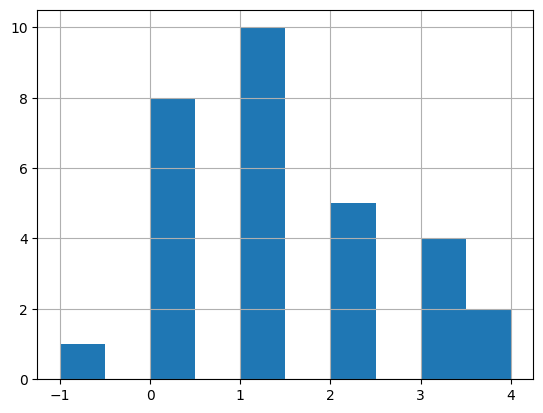

In [35]:
(df['quality_of_human'] - df['quality_of_baseline']).hist()

In [28]:
data1 = df['quality_of_human'].to_numpy()
data2 = df['quality_of_baseline'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: -1.3000
95% confidence interval (percentile method): ConfidenceInterval(low=-1.7666666666666666, high=-0.8666666666666667)
Bootstrap standard error: 0.2327


In [29]:
data1 = df['quality_of_human'].to_numpy()
data2 = df['quality_of_rag'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: -2.1333
95% confidence interval (percentile method): ConfidenceInterval(low=-2.6, high=-1.6666666666666665)
Bootstrap standard error: 0.2431


In [30]:
data1 = df['quality_of_human'].to_numpy()
data2 = df['quality_of_human'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: 0.0000
95% confidence interval (percentile method): ConfidenceInterval(low=0.0, high=0.0)
Bootstrap standard error: 0.0000


In [71]:
data1 = df['informative_of_human'].to_numpy()
data2 = df['informative_of_baseline'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: -1.0667
95% confidence interval (percentile method): ConfidenceInterval(low=-1.5333333333333332, high=-0.6333333333333333)
Bootstrap standard error: 0.2312


In [72]:
data1 = df['informative_of_human'].to_numpy()
data2 = df['informative_of_rag'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: -1.9333
95% confidence interval (percentile method): ConfidenceInterval(low=-2.4666666666666663, high=-1.4333333333333331)
Bootstrap standard error: 0.2626


In [73]:
data1 = df['informative_of_human'].to_numpy()
data2 = df['informative_of_human'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: 0.0000
95% confidence interval (percentile method): ConfidenceInterval(low=0.0, high=0.0)
Bootstrap standard error: 0.0000


In [76]:
data1 = df['relevance_of_human'].to_numpy()
data2 = df['relevance_of_baseline'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: -1.1333
95% confidence interval (percentile method): ConfidenceInterval(low=-1.6333333333333329, high=-0.6666666666666665)
Bootstrap standard error: 0.2484


In [77]:
data1 = df['relevance_of_human'].to_numpy()
data2 = df['relevance_of_rag'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: -2.0667
95% confidence interval (percentile method): ConfidenceInterval(low=-2.666666666666667, high=-1.4333333333333331)
Bootstrap standard error: 0.3149


In [78]:
data1 = df['relevance_of_human'].to_numpy()
data2 = df['relevance_of_human'].to_numpy()

inData = (data1, data2)

res = bootstrap(inData
                , mean_difference
                , confidence_level=0.95
                , n_resamples=10000,
                paired=True
                , random_state=42
                , method='percentile')

print(f"Original mean difference: {mean_difference(data1, data2):.4f}")
print(f"95% confidence interval (percentile method): {res.confidence_interval}")
print(f"Bootstrap standard error: {res.standard_error:.4f}")

Original mean difference: 0.0000
95% confidence interval (percentile method): ConfidenceInterval(low=0.0, high=0.0)
Bootstrap standard error: 0.0000


In [79]:
scoreDf['font_weight'] = scoreDf.apply(lambda x: 'bold' if ((x['model'] == 'Human') & (x['score_name'] == 'quality')) 
                                                           | ((x['model'] == 'Human') & (x['score_name'] == 'informativeness'))
                                                            | ((x['model'] == 'Human') & (x['score_name'] == 'relevance'))  else 'normal', axis=1)

In [80]:
# Create the grouped bar chart
chart = alt.Chart(scoreDf).mark_bar().encode(
                x=alt.X("score_name:N", title=None, axis=alt.Axis(labelAngle=0)),
                y=alt.Y("score:Q", title="Average Score", axis = alt.Axis(labels=False)),
                xOffset="model:N",
                color=alt.Color("model:N", legend=alt.Legend(title=None))
            ).properties(
                title="Human Evaluation"
                ,width = 400
                ,height = 300

            )

# Text layer
text = chart.encode(
                text=alt.Text('score:Q', format='.1f'), # Format the text as desired
                color=alt.value('black') # Set text color
            ).transform_calculate(
                    fw="datum.font_weight"   # create a calculated field alias
                ).mark_text(
                    align='center',
                    baseline='bottom',
                    dy=-5,  # Nudge text slightly above the bars
                    fontWeight=alt.ExprRef(expr="datum.fw")   # bind font weight dynamically
                )

# & (alt.datum.score_name == 'informativeness')

finalChart = (chart + text)\
                .configure_axis(
                    grid=False
                    ,ticks=False
                )\
                .configure_view(
                    strokeWidth=0
                )

finalChart


alt.LayerChart(...)